In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
ngrams4 = pd.read_csv("../resources/ngram_4.csv")

In [6]:
ngrams4.shape

(319201, 2)

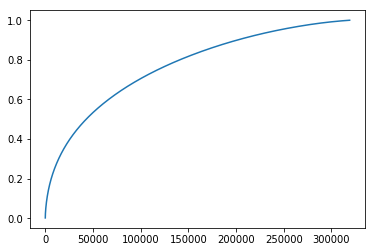

In [15]:
(ngrams4.freq / ngrams4.freq.sum()).cumsum().plot(kind='line')

In [16]:
ng_prop = (ngrams4.freq / ngrams4.freq.sum()).cumsum()

In [38]:
diag_vec = np.array((ng_prop.shape[0], ng_prop.iloc[-1]))

In [39]:
def compute_distance(vec_x, ref_vec):
    ref_len = np.sqrt(np.dot(ref_vec, ref_vec))
    coeff_proj = np.dot(vec_x, ref_vec) / ref_len
    vec_proj = coeff_proj * ref_vec / ref_len    
    vec_diff = vec_x - vec_proj
    return np.sqrt(np.dot(vec_diff, vec_diff))

In [40]:
vec_dists = np.zeros(ng_prop.shape[0])
for i, x in enumerate(ng_prop):
    vec_dists[i] = compute_distance([i, x], diag_vec)

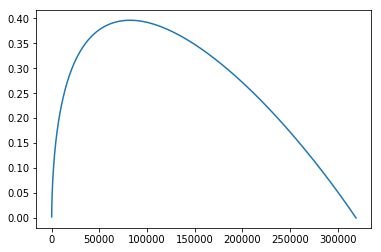

In [43]:
plt.plot(vec_dists)

In [44]:
np.argmax(vec_dists)

82317

In [45]:
ng_prop[82317]

0.6540741059271844

In [49]:
ngrams4.freq[82317]

322

In [52]:
ngrams4.iloc[82313:82322, :]

,ngram,freq
82313,常常可以,322
82314,城市大學,322
82315,台獨意識,322
82316,把鼻涕一,322
82317,得栩栩如,322
82318,蓋洛博士,321
82319,句玩笑話,321
82320,來自桃園,321
82321,今年入圍,321
